In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,cross_val_predict
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
#from dmba import regressionSummary
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('train.csv',index_col=0)

# Exploratory data analysis 

In [316]:
#obtain the shape of the dataset
df.shape

(1460, 80)

In [317]:
#obtain basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [318]:
#review the first five rows of the dataset
with pd.option_context('display.max_columns', None):
  display (df.head())

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                     
1          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
4          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
5          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                       
1        Norm     1Fam     2Story            7            5       2003   
2        Norm     1Fam     1Story            6            8       1976   
3        Norm     1Fam     2Story            7            5       2001   
4        Norm     1Fam     2Story            7            5       1915   
5        Norm     1Fam     2Story            8            5       2000   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                       
1           2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
2           1976     Gable  CompShg     MetalSd     MetalSd       None   
3           2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4           1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
5           2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
Id                                                                             
1        196.0        Gd        TA      PConc       Gd       TA           No   
2          0.0        TA        TA     CBlock       Gd       TA           Gd   
3        162.0        Gd        TA      PConc       Gd       TA           Mn   
4          0.0        TA        TA     BrkTil       TA       Gd           No   
5        350.0        Gd        TA      PConc       Gd       TA           Av   

   BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
Id                                                                             
1           GLQ         706          Unf           0        150          856   
2           ALQ         978          Unf           0        284         1262   
3           GLQ         486          Unf           0        434          920   
4           ALQ         216          Unf           0        540          756   
5           GLQ         655          Unf           0        490         1145   

   Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
Id                                                                             
1     GasA        Ex          Y      SBrkr       856       854             0   
2     GasA        Ex          Y      SBrkr      1262         0             0   
3     GasA        Ex          Y      SBrkr       920       866             0   
4     GasA        Gd          Y      SBrkr       961       756             0   
5     GasA        Ex          Y      SBrkr      1145      1053             0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                            
1        1710             1             0         2         1             3   
2        1262             0             1  

In [319]:
#obtain the basic information of the target variable (SalePrice)
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# Handle Missing Value
Because the data is small, the team try to impute the missing value other than removing them.

In [ ]:
#look for missing values
df1 = df.isnull().sum()
df1[df1 != 0]

In [321]:
# fill median value for missing value in LotFrontage column
df['LotFrontage'] = df['LotFrontage'] .fillna(value=df['LotFrontage'].median())

# fill'No_Alley' for missing values in Alley column
df['Alley'] = df['Alley'].fillna('No_Alley')

# fill 'No_Basement' for missing value in BsmtQual column
df['BsmtQual'] = df['BsmtQual'].fillna('No_Basement')

# fill 'No_Basement' for missing value in BsmtQual column
df['BsmtQual'] = df['BsmtQual'].fillna('No_Basement')

# fill 'No_Basement' for missing value in BsmtCond column
df['BsmtCond'] = df['BsmtCond'].fillna('No_Basement')

In [322]:
# BsmtExposure has one more missing value than BsmtQual and No_Basement.
# Based on the exploration below, the addtional missing value indicates that the basement is not finished yet.
# The team decide use the most frequen to fill that addtional missing value and fill'No_Basement'  to the rest.

with pd.option_context('display.max_columns', None):
  display (df[df['BsmtExposure'].isnull()])
df.loc[949,'BsmtExposure']=df['BsmtExposure'].mode()[0]
df['BsmtExposure'] = df['BsmtExposure'].fillna('No_Basement')
df.BsmtExposure.value_counts()

MSSubClass MSZoning  LotFrontage  LotArea Street     Alley LotShape  \
Id                                                                          
18            90       RL         72.0    10791   Pave  No_Alley      Reg   
40            90       RL         65.0     6040   Pave  No_Alley      Reg   
91            20       RL         60.0     7200   Pave  No_Alley      Reg   
103           90       RL         64.0     7018   Pave  No_Alley      Reg   
157           20       RL         60.0     7200   Pave  No_Alley      Reg   
183           20       RL         60.0     9060   Pave  No_Alley      Reg   
260           20       RM         70.0    12702   Pave  No_Alley      Reg   
343           90       RL         69.0     8544   Pave  No_Alley      Reg   
363           85       RL         64.0     7301   Pave  No_Alley      Reg   
372           50       RL         80.0    17120   Pave  No_Alley      Reg   
393           20       RL         69.0     8339   Pave  No_Alley      IR1   
521          190       RL         60.0    10800   Pave      Grvl      Reg   
533           20       RL         60.0     7200   Pave  No_Alley      Reg   
534           20       RL         50.0     5000   Pave  No_Alley      Reg   
554           20       RL         67.0     8777   Pave  No_Alley      Reg   
647           20       RL         60.0     7200   Pave  No_Alley      Reg   
706          190       RM         70.0     5600   Pave  No_Alley      Reg   
737           90       RL         60.0     8544   Pave  No_Alley      Reg   
750           50       RL         50.0     8405   Pave  No_Alley      Reg   
779           90       RH         60.0     8400   Pave  No_Alley      Reg   
869           60       RL         69.0    14762   Pave  No_Alley      IR2   
895           90       RL         64.0     7018   Pave  No_Alley      Reg   
898           90       RL         64.0     7018   Pave  No_Alley      Reg   
949           60       RL         65.0    14006   Pave  No_Alley      IR1   
985           90       RL         75.0    10125   Pave  No_Alley      Reg   
1001          20       RL         74.0    10206   Pave  No_Alley      Reg   
1012          90       RL         75.0     9825   Pave  No_Alley      Reg   
1036          20       RL         69.0    11500   Pave  No_Alley      IR1   
1046          20       RL         69.0    13680   Pave  No_Alley      IR1   
1049          20       RL        100.0    21750   Pave  No_Alley      Reg   
1050          20       RL         60.0    11100   Pave  No_Alley      Reg   
1091          90       RL         60.0     8544   Pave  No_Alley      Reg   
1180          20       RL         77.0     8335   Pave  No_Alley      Reg   
1217          90       RM         68.0     8930   Pave  No_Alley      Reg   
1219          50       RM         52.0     6240   Pave  No_Alley      Reg   
1233          90       RL         70.0     9842   Pave  No_Alley      Reg   
1322          20       RL         69.0     6627   Pave  No_Alley      IR1   
1413          90       RL         60.0     7200   Pave  No_Alley      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                       
18           Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
40           Lvl    AllPub    Inside       Gtl      Edwards       Norm   
91           Lvl    AllPub    Inside       Gtl        NAmes       Norm   
103          Bnk    AllPub    Inside       Gtl      SawyerW       Norm   
157          Lvl    AllPub    Inside       Gtl        NAmes       Norm   
183          Lvl    AllPub    Inside       Gtl      Edwards     Artery   
260          Lvl    AllPub    Inside       Gtl      OldTown       Norm   
343          Lvl    AllPub    Inside       Gtl        NAmes       Norm   
363          Lvl    AllPub    Corner       Gtl      Edwards       Norm   
372          Lvl    AllPub    Inside       Gtl      ClearCr      Feedr   
393          Lvl    AllPub    Inside 

No             954
Av             221
Gd             134
Mn             114
No_Basement     37
Name: BsmtExposure, dtype: int64

In [323]:
# fill 'No_Basement' for missing value in BsmtFinType1 column
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('No_Basement')

In [324]:
# BsmtFinType2 has one more missing value than BsmtQual, No_Basement, and BsmtFinType1.
# Based on the exploration below, the addtional missing value indicates that the basement area (if multiple types) 
#is not finished yet. The team decide to assign Unifnshed (Unf) to fill this addtional missing value 
# and fill 'No_Basement' to the rest

with pd.option_context('display.max_columns', None):
  display (df[df['BsmtFinType2'].isnull()])

df.loc[333,'BsmtFinType2']='Unf'
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('No_Basement')
df.BsmtFinType2.value_counts()

MSSubClass MSZoning  LotFrontage  LotArea Street     Alley LotShape  \
Id                                                                          
18            90       RL         72.0    10791   Pave  No_Alley      Reg   
40            90       RL         65.0     6040   Pave  No_Alley      Reg   
91            20       RL         60.0     7200   Pave  No_Alley      Reg   
103           90       RL         64.0     7018   Pave  No_Alley      Reg   
157           20       RL         60.0     7200   Pave  No_Alley      Reg   
183           20       RL         60.0     9060   Pave  No_Alley      Reg   
260           20       RM         70.0    12702   Pave  No_Alley      Reg   
333           20       RL         85.0    10655   Pave  No_Alley      IR1   
343           90       RL         69.0     8544   Pave  No_Alley      Reg   
363           85       RL         64.0     7301   Pave  No_Alley      Reg   
372           50       RL         80.0    17120   Pave  No_Alley      Reg   
393           20       RL         69.0     8339   Pave  No_Alley      IR1   
521          190       RL         60.0    10800   Pave      Grvl      Reg   
533           20       RL         60.0     7200   Pave  No_Alley      Reg   
534           20       RL         50.0     5000   Pave  No_Alley      Reg   
554           20       RL         67.0     8777   Pave  No_Alley      Reg   
647           20       RL         60.0     7200   Pave  No_Alley      Reg   
706          190       RM         70.0     5600   Pave  No_Alley      Reg   
737           90       RL         60.0     8544   Pave  No_Alley      Reg   
750           50       RL         50.0     8405   Pave  No_Alley      Reg   
779           90       RH         60.0     8400   Pave  No_Alley      Reg   
869           60       RL         69.0    14762   Pave  No_Alley      IR2   
895           90       RL         64.0     7018   Pave  No_Alley      Reg   
898           90       RL         64.0     7018   Pave  No_Alley      Reg   
985           90       RL         75.0    10125   Pave  No_Alley      Reg   
1001          20       RL         74.0    10206   Pave  No_Alley      Reg   
1012          90       RL         75.0     9825   Pave  No_Alley      Reg   
1036          20       RL         69.0    11500   Pave  No_Alley      IR1   
1046          20       RL         69.0    13680   Pave  No_Alley      IR1   
1049          20       RL        100.0    21750   Pave  No_Alley      Reg   
1050          20       RL         60.0    11100   Pave  No_Alley      Reg   
1091          90       RL         60.0     8544   Pave  No_Alley      Reg   
1180          20       RL         77.0     8335   Pave  No_Alley      Reg   
1217          90       RM         68.0     8930   Pave  No_Alley      Reg   
1219          50       RM         52.0     6240   Pave  No_Alley      Reg   
1233          90       RL         70.0     9842   Pave  No_Alley      Reg   
1322          20       RL         69.0     6627   Pave  No_Alley      IR1   
1413          90       RL         60.0     7200   Pave  No_Alley      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                       
18           Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
40           Lvl    AllPub    Inside       Gtl      Edwards       Norm   
91           Lvl    AllPub    Inside       Gtl        NAmes       Norm   
103          Bnk    AllPub    Inside       Gtl      SawyerW       Norm   
157          Lvl    AllPub    Inside       Gtl        NAmes       Norm   
183          Lvl    AllPub    Inside       Gtl      Edwards     Artery   
260          Lvl    AllPub    Inside       Gtl      OldTown       Norm   
333          Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
343          Lvl    AllPub    Inside       Gtl        NAmes       Norm   
363          Lvl    AllPub    Corner       Gtl      Edwards       Norm   
372          Lvl    AllPub    Inside 

Unf            1257
Rec              54
LwQ              46
No_Basement      37
BLQ              33
ALQ              19
GLQ              14
Name: BsmtFinType2, dtype: int64

In [325]:
# fill 'No_Fireplace' for missing value in  FireplaceQu column
df['FireplaceQu'] = df['FireplaceQu'].fillna('No_Fireplace')

# fill 'No_Garage' for missing value in GarageType column
df['GarageType'] = df['GarageType'].fillna('No_Garage')

# fill 'No_Garage' for missing value in GarageFinish column
df['GarageFinish'] = df['GarageFinish'].fillna('No_Garage')

# fill 'No_Garage' for missing value in GarageQual column
df['GarageQual'] = df['GarageQual'].fillna('No_Garage')

# fill 'No_Garage' for missing value in  GarageCond column
df['GarageCond'] = df['GarageCond'].fillna('No_Garage')

# fill 'No_Pool' for missing value in PoolQC column
df['PoolQC'] = df['PoolQC'].fillna('No_Pool')

# fill 'No_Fence' for missing value in Fence column
df['Fence'] = df['Fence'].fillna('No_Fence')

# fill 'No_MiscFeature' for missing value in MiscFeature column
df['MiscFeature'] = df['MiscFeature'].fillna('No_MiscFeature')

# fill the most frequent category for missing value in Electrical column
df['Electrical'] = df['Electrical'].fillna(value=df['Electrical'].mode()[0])

# fill the most frequent category for missing value in MasVnrType column
df['MasVnrType'] = df['MasVnrType'].fillna(value=df['MasVnrType'].mode()[0])

# fill 0 for missing value in MasVnrArea column
df['MasVnrArea'] = df['MasVnrArea'] .fillna(value=0)

# fill 0 for missing value in GarageYrBlt column
df['GarageYrBlt'] = df['GarageYrBlt'] .fillna(value=0)

In [326]:
# recheck whether any missing value
df2 = df.isnull().sum()
df2[df2 != 0]

Series([], dtype: int64)

# Handle any duplciate row

In [327]:
# Do not find duplciate row
df_dup=df.duplicated()
df_dup[df_dup]

Series([], dtype: bool)

# Preprocess the data type for further anlysis

In [328]:
# due to the nature and data description, the team decides to conver MSSubClass to category data type
df.MSSubClass=df.MSSubClass.astype('category')

# Analyze target variable and relationship between variables

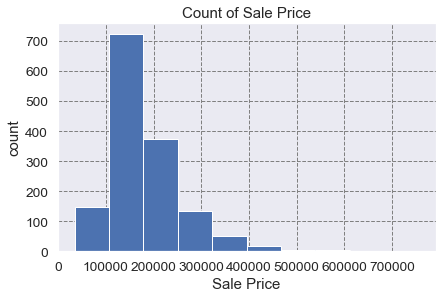

In [63]:
# Genearte the histgram for target variable 
fig, ax = plt.subplots()
ax.hist(df.SalePrice)
ax.set_axisbelow(True) 
ax.grid(which='major', color='grey', linestyle='--')
plt.title('Count of Sale Price')
plt.tight_layout()
ax.set_xlabel('Sale Price')
ax.set_ylabel('count')
plt.show()

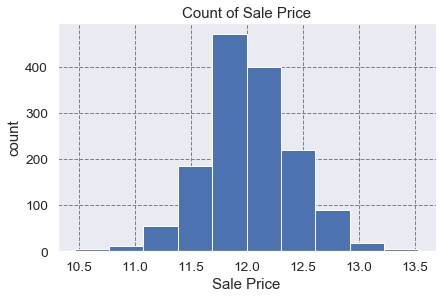

In [64]:
fig, ax = plt.subplots()
ax.hist(np.log(df.SalePrice))
ax.set_axisbelow(True) 
ax.grid(which='major', color='grey', linestyle='--')
plt.title('Count of Sale Price')
plt.tight_layout()
ax.set_xlabel('Sale Price')
ax.set_ylabel('count')
plt.show()

Based on the above histogram, the team found that the distribution of saleprice is positive shewness. if using log tranformation, it is a normail distrubition.

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334771
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
GarageYrBlt      0.261366
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


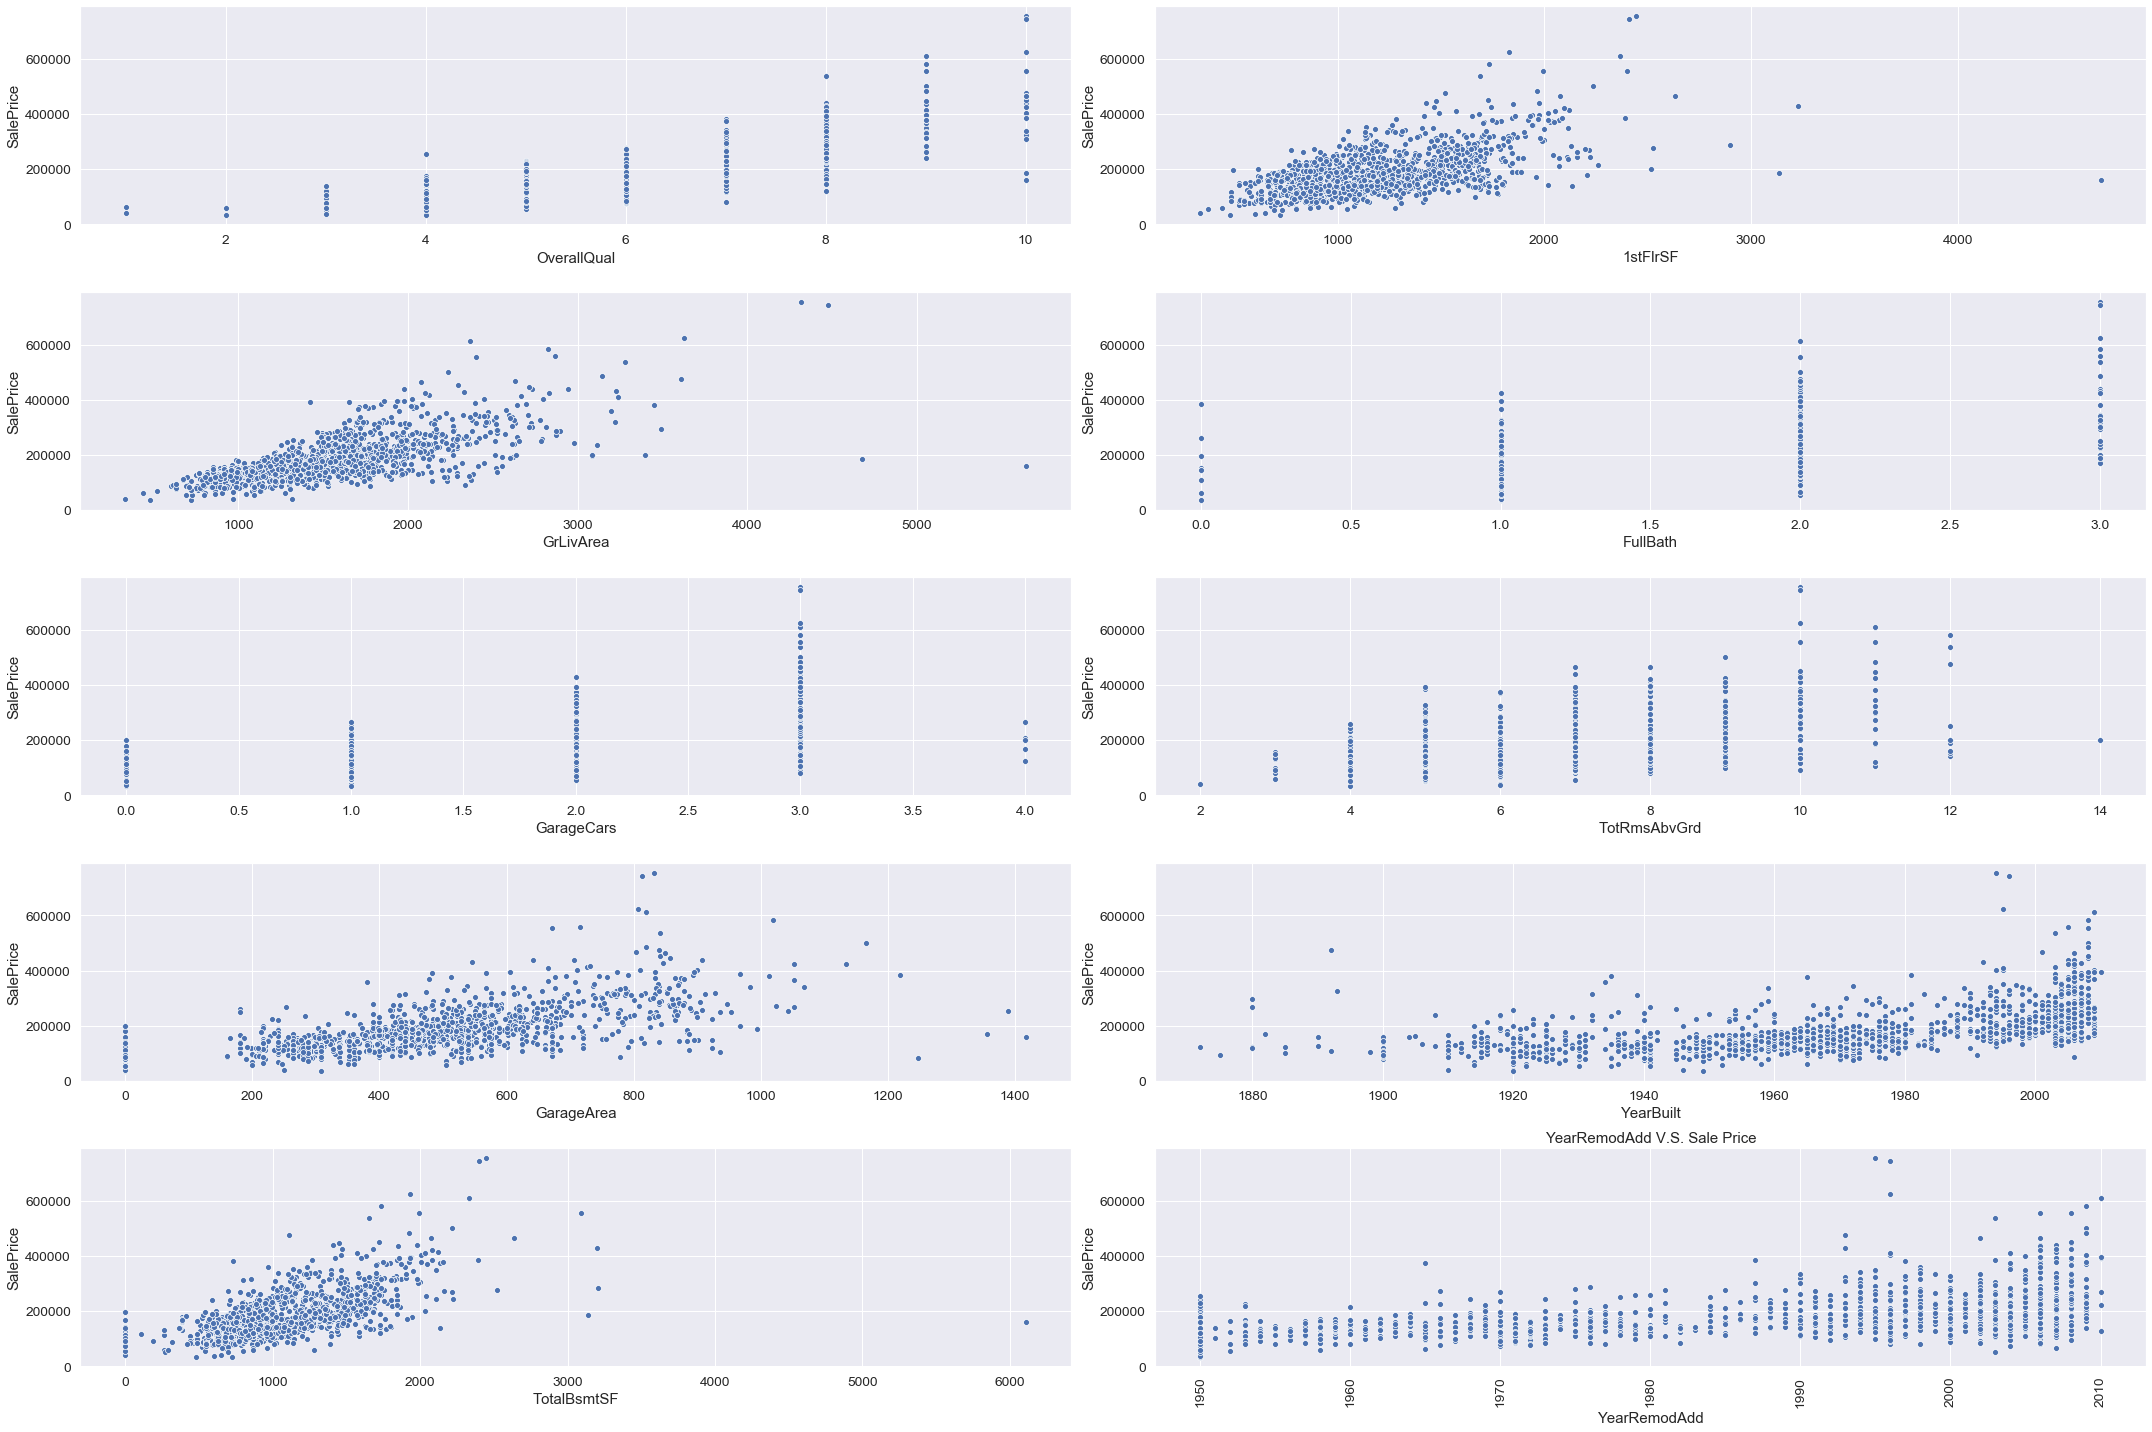

In [65]:
# calculate the correlation to identify the relationships between saleprice and other preditors
corrMatrix = df.corr()
print(corrMatrix.SalePrice.sort_values(ascending=False))

fig, axes = plt.subplots(5,2)
fig.set_size_inches(30, 20)
a=0
b=0
for i in (corrMatrix.SalePrice.sort_values(ascending=False).index[1:11]):
    sns.scatterplot(df[i], (df['SalePrice']),ax=axes[a,b])
    plt.title(str(i)+" V.S. Sale Price")
    plt.xlabel(i)
    plt.ylabel("SalePrice")
    plt.xticks(rotation=90)
    plt.tight_layout()
    a += 1
    if a % 5 != 0:
        a += 0
        b += 0
    else: 
        a = 0
        b += 1
plt.show()

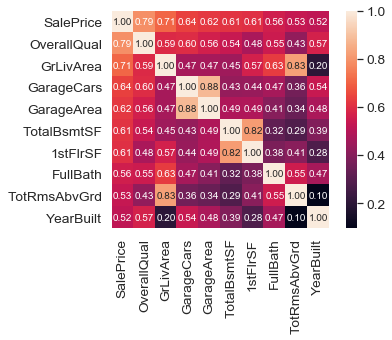

In [68]:
#Saleprice correlation matrix
k = 10 #number of variables for heatmap
#corrmat = df_train.corr()
cols = corrMatrix.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Based on the above correlation calucation and scatterplots, the team found that OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd, YearBuilt,YearRemodAdd have the correatlion ratio above 0.5 (positive relationship).... 

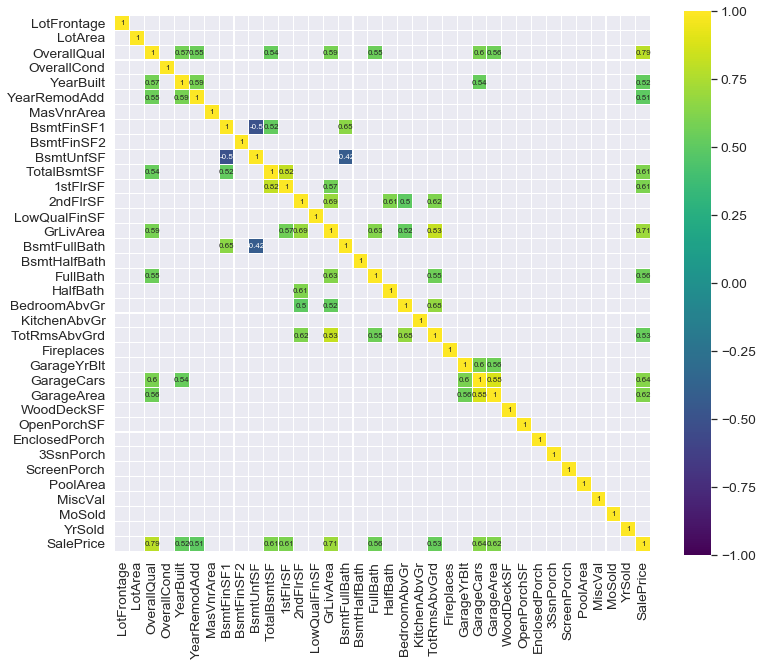

In [69]:
# To analyze the relationships among nemeric variables
plt.figure(figsize=(12, 10))

sns.heatmap(corrMatrix[(corrMatrix >= 0.5) | (corrMatrix <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

When checking the cross-correlation, highly correlated features include GarageArea & GarageCars (0.88), TotalRmsAbvGrd & GrLivArea (0.83), and TotalBsmtSF & 1stFlrSF (0.82)....

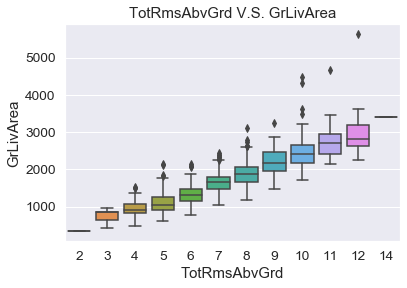

In [70]:
# Relation between TotRmsAbvGrd and GrLivArea
sns.boxplot(df['TotRmsAbvGrd'], df['GrLivArea'])
plt.title("TotRmsAbvGrd V.S. GrLivArea")
plt.xlabel('TotRmsAbvGrd')
plt.ylabel("GrLivArea")
plt.show()

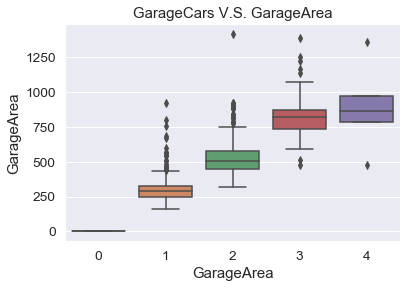

In [71]:
# Relation between GarageCars and GarageCars
sns.boxplot(df['GarageCars'], df['GarageArea'])
plt.title("GarageCars V.S. GarageArea")
plt.xlabel('GarageArea')
plt.ylabel("GarageArea")
plt.show()

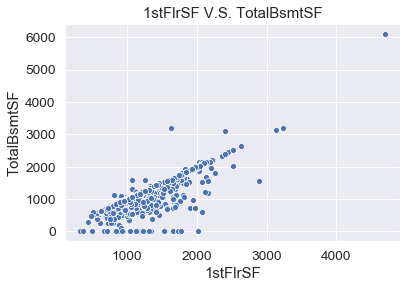

In [72]:
# Relation between 1stFlrSF and TotalBsmtSF
sns.scatterplot(df['1stFlrSF'], df['TotalBsmtSF'])
plt.title("1stFlrSF V.S. TotalBsmtSF")
plt.xlabel('1stFlrSF')
plt.ylabel("TotalBsmtSF")
plt.show()

Based on the above heatmap, TotRmsAbvGrd has strong relationship with GrLivArea, GarageArea has strong relationship with GarageCars, and 1stFlrSF has strong relationship with TotalBsmtSF.

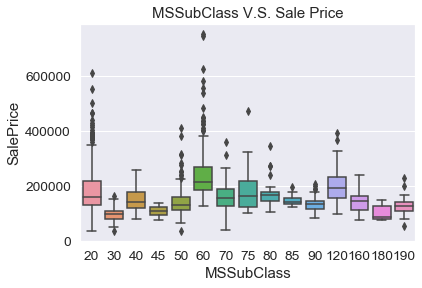

In [238]:
# Relation between MSSubClass and SalePrice
sns.boxplot(df['MSSubClass'], df['SalePrice'])
plt.title("MSSubClass V.S. Sale Price")
plt.xlabel('MSSubClass')
plt.ylabel("SalePrice")
plt.show()

 The meaning of each number from descriptiontion is as follows:
 
        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

Based on the charts above, it indicates that:
1. the age of house is a significatn important facotr in the sale price; House  is built on or after 1946 has a higheer sale price; 
2. the number of story is another important facotr in the sale price; 
3. the house that is whether finished or not is another impoartnt factor in the sale price.

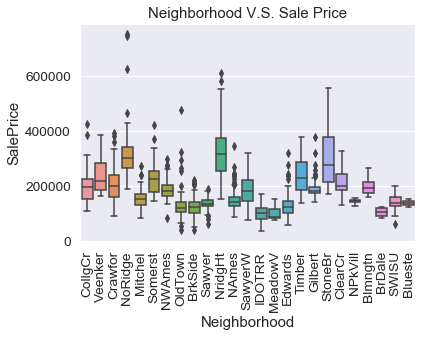

In [239]:
# Relation between Neighborhood and SalePrice
sns.boxplot(df['Neighborhood'], df['SalePrice'])
plt.title("Neighborhood V.S. Sale Price")
plt.xlabel('Neighborhood')
plt.xticks(rotation=90)
plt.ylabel("SalePrice")
plt.show()

 The meaning of value in Neighborhood (Physical locations within Ames city limits) from descriptiontion is as follows:
 
       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker		

Based on the charts above, it indicates that the sale price is significantly affedct by the physical locations.

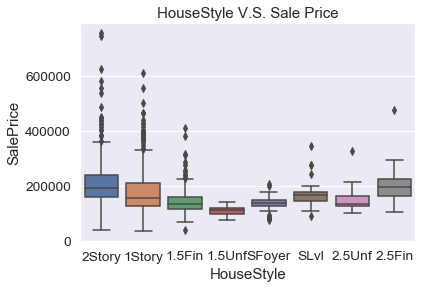

In [240]:
# Relation between HouseStyle and SalePrice
sns.boxplot(df['HouseStyle'], df['SalePrice'])
plt.title("HouseStyle V.S. Sale Price")
plt.xlabel('HouseStyle')
plt.ylabel("SalePrice")
plt.show()

The meaning of value in Neighborhood (Physical locations within Ames city limits) from descriptiontion is as follows:
 
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl      Split Level

Based on the charts above, it confirmed the first thought based on the charts of MSSubClass:
1. the number of story is more, the sale price is higher; 
2. finished house is more expensive than unfinished house.

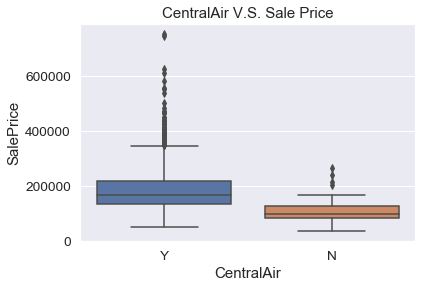

In [241]:
# Relation between CentralAir and SalePrice
sns.boxplot(df['CentralAir'], df['SalePrice'])
plt.title("CentralAir V.S. Sale Price")
plt.xlabel('CentralAir')
plt.ylabel("SalePrice")
plt.show()

The meaning of value in CentralAir (Central air conditioning) from descriptiontion is as follows:
 
       N	No
       Y	Yes

Based on the charts above, it indicates that house with central air conditioning has a higher sale price and mroe people perfer central air conditioning. 

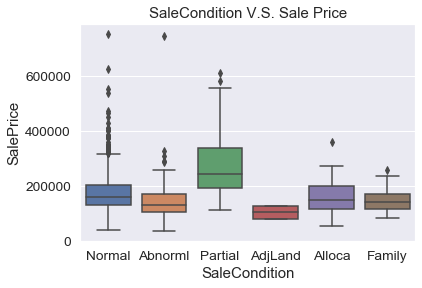

In [242]:
# Relation between SaleCondition and SalePrice
sns.boxplot(df['SaleCondition'], df['SalePrice'])
plt.title("SaleCondition V.S. Sale Price")
plt.xlabel('SaleCondition')
plt.ylabel("SalePrice")
plt.show()

The meaning of value in SaleCondition (Condition of sale) from descriptiontion is as follows:
 
       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

Based on the charts above, it indicates that his  affedct by the sale condition. New contructed house usually has the higher sale price, and adjoining Land Purchase has the lowest sale price.

# Outlier

Becaue the size of the dataset is small, the team decides not to remvoe any outlier in this dataset at this point. 

# Development Baseline Models

The team will use Root-Mean-Squared-Error (RMSE) to measure each model performance. Bacause the dataset is small, the team will also use cross validatin to generate a more accuracy measurement. Moreover, the team will use log-transformation in feature engineering on target value, so the team will use corss_val_predict. In order to get the consistent performance measurement, the team decides to consistenly use corss_val_predict in below each performance measurement step.

In [79]:
#Preare train dataset and validation dateset
excludeColumns = ('SalePrice')
predictors = [s for s in df.columns if s not in excludeColumns]
outcome = 'SalePrice'
x = pd.get_dummies(df[predictors],drop_first=True)
y = df[outcome]

In [157]:
# Random Forest Regressor with 10-fold cross validation
rfr_pred = cross_val_predict(RandomForestRegressor(), x, y, cv=10)
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y, rfr_pred)),2))

RMSE: 29663.57


In [159]:
#Gradient Boosting Regressor with 10-fold cross validation
gbr_pred = cross_val_predict(GradientBoostingRegressor(), x, y, cv=10)
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y, gbr_pred)),2))

RMSE: 27057.32


In [160]:
#XGBoost Regressor with 10-fold cross validation
xgb_pred = cross_val_predict(XGBRegressor(), x, y, cv=10)
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y, xgb_pred)),2))

RMSE: 30377.9


In [161]:
#Cat Boost Regressor with 10-fold cross validation
cbr_pred = cross_val_predict(CatBoostRegressor(), x, y, cv=10)
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y, cbr_pred)),2))

Learning rate set to 0.040974
0:	learn: 78558.7465259	total: 6.12ms	remaining: 6.11s
1:	learn: 76508.3262154	total: 12.7ms	remaining: 6.32s
2:	learn: 74709.7122762	total: 19.2ms	remaining: 6.38s
3:	learn: 72926.7017688	total: 27.3ms	remaining: 6.81s
4:	learn: 71205.9321016	total: 33.8ms	remaining: 6.73s
5:	learn: 69533.9874744	total: 40.4ms	remaining: 6.69s
6:	learn: 67859.2647938	total: 46.5ms	remaining: 6.6s
7:	learn: 66215.6760504	total: 52.8ms	remaining: 6.54s
8:	learn: 64647.8646647	total: 60.6ms	remaining: 6.67s
9:	learn: 63034.9406096	total: 67.4ms	remaining: 6.67s
10:	learn: 61576.6288520	total: 73.4ms	remaining: 6.6s
11:	learn: 60314.4675730	total: 79.4ms	remaining: 6.53s
12:	learn: 59058.5505101	total: 85.8ms	remaining: 6.51s
13:	learn: 57736.3746507	total: 92.1ms	remaining: 6.49s
14:	learn: 56569.5009676	total: 98ms	remaining: 6.44s
15:	learn: 55458.5973207	total: 105ms	remaining: 6.43s
16:	learn: 54379.4634700	total: 111ms	remaining: 6.39s
17:	learn: 53230.7776420	total: 11

THe baseline models are as follows:

1. Random ForestRegressor: 29663.57
2. Gradient BoostingRegressor: 27057.32
3. XGBoost Regressor: 30377.9
4. Cat Boost Regressor: 25641.93

# Select the most important features

In [162]:
#Random Forest Regressor
rfr = RandomForestRegressor()
train_X, valid_X, train_y, valid_y = train_test_split(x, y, test_size=0.3, random_state=1)
rfr.fit(train_X, train_y)
predictions = rfr.predict(valid_X)
#print('Root Mean Squared Log Error:', np.sqrt(metrics.mean_squared_error(np.log(valid_y), np.log(predictions))))
#print('Root Mean Squared Log Error:', np.sqrt(metrics.mean_squared_log_error(valid_y, predictions)))
rfr_coef=pd.DataFrame({'rfr_coefficient': rfr.feature_importances_}, index=x.columns).sort_values('rfr_coefficient',ascending=False)
rfr_coef
with pd.option_context('display.max_rows', None):
  display (rfr_coef)

rfr_coefficient
OverallQual                    5.137082e-01
GrLivArea                      1.183214e-01
GarageCars                     3.976935e-02
TotalBsmtSF                    3.606225e-02
1stFlrSF                       3.225894e-02
BsmtFinSF1                     3.015312e-02
GarageArea                     2.065300e-02
2ndFlrSF                       2.037022e-02
LotArea                        1.696660e-02
TotRmsAbvGrd                   1.320066e-02
YearBuilt                      1.010992e-02
MasVnrArea                     9.909772e-03
LotFrontage                    9.612144e-03
GarageYrBlt                    8.509895e-03
YearRemodAdd                   7.864725e-03
MoSold                         6.586371e-03
WoodDeckSF                     6.532792e-03
FullBath                       6.434853e-03
BsmtUnfSF                      5.848512e-03
OverallCond                    5.012282e-03
OpenPorchSF                    4.347278e-03
LotShape_Reg                   3.799033e-03
ScreenPorch                    3.003414e-03
BsmtQual_Gd                    2.999922e-03
ExterQual_Gd                   2.882200e-03
Neighborhood_NridgHt           2.498572e-03
YrSold                         2.191773e-03
GarageType_Detchd              2.067565e-03
MSZoning_RM                    1.990430e-03
ExterQual_TA                   1.954876e-03
BsmtExposure_Gd                1.949515e-03
Neighborhood_StoneBr           1.826733e-03
GarageFinish_Unf               1.779429e-03
BedroomAbvGr                   1.735153e-03
Fireplaces                     1.732805e-03
KitchenQual_Gd                 1.419634e-03
Exterior2nd_HdBoard            1.178302e-03
GarageType_Attchd              1.073055e-03
Exterior2nd_VinylSd            1.005854e-03
CentralAir_Y                   9.773831e-04
SaleType_New                   9.463816e-04
LotConfig_Inside               9.119417e-04
MasVnrType_BrkFace             8.830000e-04
Neighborhood_Crawfor           8.689590e-04
MSSubClass_60                  8.498043e-04
FireplaceQu_Gd                 8.426837e-04
FireplaceQu_No_Fireplace       8.345258e-04
SaleType_WD                    8.291334e-04
RoofStyle_Hip                  8.234889e-04
RoofStyle_Gable                7.834536e-04
HalfBath                       7.753086e-04
BsmtExposure_No                7.641536e-04
BsmtFullBath                   7.553477e-04
SaleCondition_Normal           7.482185e-04
KitchenQual_TA                 7.179233e-04
SaleCondition_Partial          7.145152e-04
BsmtFinSF2                     6.543718e-04
Exterior1st_HdBoard            6.541211e-04
MasVnrType_Stone               6.453112e-04
BsmtHalfBath                   6.021332e-04
GarageFinish_RFn               5.720851e-04
LandContour_HLS                5.401699e-04
KitchenAbvGr                   5.275889e-04
Functional_Typ                 5.122352e-04
BsmtFinType1_GLQ               4.978235e-04
GarageQual_TA                  4.872797e-04
MasVnrType_None                4.789968e-04
BsmtQual_TA                    4.720638e-04
FireplaceQu_TA                 4.664479e-04
Neighborhood_Timber            4.498318e-04
Condition1_Norm                4.395604e-04
LandSlope_Mod                  4.330641e-04
Neighborhood_Edwards           4.216125e-04
LotConfig_CulDSac              4.170516e-04
BsmtCond_TA                    3.898116e-04
EnclosedPorch                  3.883637e-04
Exterior1st_VinylSd            3.800028e-04
SaleCondition_Family           3.717186e-04
Exterior2nd_MetalSd            3.600593e-04
Neighborhood_OldTown           3.514786e-04
Exterior1st_CemntBd            3.479352e-04
LandContour_Lvl                3.457803e-04
HouseStyle_1Story              3.416241e-04
RoofMatl_CompShg               3.340533e-04
BsmtFinType2_Unf               3.311111e-04
Foundation_PConc               3.144896e-04
Exterior1st_MetalSd            3.111082e-04
ExterCond_Gd                   2.890242e-04
HeatingQC_TA                   2.836382e-04
MSSubClass_50                  2.821213e-04
Neighborhood_NoRidge    

In [163]:
#Gradient Boosting Regressor
gbr = GradientBoostingRegressor()
gbr.fit(train_X, train_y)
#predictions = gbr.predict(valid_X)
#print('Root Mean Squared Log Error:', np.sqrt(metrics.mean_squared_error(np.log(valid_y), np.log(predictions))))

gbr_coef=pd.DataFrame({'gbr_coefficient': gbr.feature_importances_}, index=x.columns).sort_values('gbr_coefficient',ascending=False)
gbr_coef
with pd.option_context('display.max_rows', None):
  display (gbr_coef)

gbr_coefficient
OverallQual                        0.470219
GrLivArea                          0.165903
GarageCars                         0.057196
TotalBsmtSF                        0.047596
1stFlrSF                           0.032521
BsmtFinSF1                         0.031686
YearBuilt                          0.022546
LotArea                            0.020520
2ndFlrSF                           0.018687
YearRemodAdd                       0.015490
LotFrontage                        0.009884
GarageYrBlt                        0.009608
FireplaceQu_No_Fireplace           0.008514
ExterQual_TA                       0.005745
TotRmsAbvGrd                       0.005451
MasVnrArea                         0.005417
Neighborhood_NridgHt               0.004781
WoodDeckSF                         0.004574
GarageType_Attchd                  0.004454
OverallCond                        0.004450
MSSubClass_60                      0.004251
BsmtExposure_Gd                    0.003562
MSZoning_RM                        0.003428
SaleType_New                       0.003351
Neighborhood_Crawfor               0.002949
CentralAir_Y                       0.002903
OpenPorchSF                        0.002725
GarageArea                         0.002299
BedroomAbvGr                       0.002269
KitchenQual_TA                     0.002260
Neighborhood_StoneBr               0.002225
ScreenPorch                        0.001882
BsmtUnfSF                          0.001743
RoofMatl_WdShngl                   0.001683
BsmtFinType1_GLQ                   0.001277
BsmtExposure_No                    0.001261
BsmtHalfBath                       0.001071
Exterior1st_BrkFace                0.001060
MoSold                             0.000885
Condition1_Norm                    0.000836
LotShape_Reg                       0.000820
Functional_Typ                     0.000755
FullBath                           0.000673
BsmtFinSF2                         0.000665
BsmtQual_Gd                        0.000625
KitchenAbvGr                       0.000536
LandContour_Lvl                    0.000412
Exterior1st_VinylSd                0.000369
Fireplaces                         0.000352
LandContour_HLS                    0.000317
HouseStyle_2Story                  0.000290
MasVnrType_BrkFace                 0.000288
GarageQual_Gd                      0.000277
FireplaceQu_TA                     0.000269
LotConfig_CulDSac                  0.000253
SaleCondition_Family               0.000247
MSSubClass_30                      0.000213
GarageType_CarPort                 0.000193
LotShape_IR3                       0.000179
SaleCondition_Normal               0.000176
HouseStyle_SLvl                    0.000164
EnclosedPorch                      0.000161
MasVnrType_None                    0.000160
Exterior2nd_MetalSd                0.000156
PoolArea                           0.000155
Exterior2nd_Brk Cmn                0.000119
YrSold                             0.000112
Foundation_Wood                    0.000107
ExterCond_TA                       0.000105
Functional_Sev                     0.000103
Neighborhood_Somerst               0.000096
HouseStyle_2.5Unf                  0.000094
LotConfig_Inside                   0.000091
Condition1_RRAe                    0.000084
Condition1_PosA                    0.000083
LandSlope_Sev                      0.000078
Neighborhood_Gilbert               0.000073
HalfBath                           0.000071
PavedDrive_P                       0.000069
Alley_Pave                         0.000069
BsmtFullBath                       0.000069
Neighborhood_Mitchel               0.000068
Exterior1st_BrkComm                0.000067
GarageFinish_RFn                   0.000066
Neighborhood_OldTown               0.000065
ExterCond_Fa                       0.000060
Heating_OthW                       0.000051
MasVnrType_Stone                   0.000046
MSSubClass_80                      0.000043
RoofMatl_CompShg                   0.000042
BsmtExposure_Mn         

In [ ]:
#Cat Boost Regressor

In [164]:
#Cat Boost Regressor
cbr = CatBoostRegressor()
train_X, valid_X, train_y, valid_y = train_test_split(x, y, test_size=0.3, random_state=1)
cbr.fit(train_X, train_y)
predictions = cbr.predict(valid_X)
#print('Root Mean Squared Log Error:', np.sqrt(metrics.mean_squared_error(np.log(valid_y), np.log(predictions))))
#print('Root Mean Squared Log Error:', np.sqrt(metrics.mean_squared_log_error(valid_y, predictions)))
cbr_coef=pd.DataFrame({'cbc_coefficient': cbr.feature_importances_}, index=x.columns).sort_values('cbc_coefficient',ascending=False)
cbr_coef
with pd.option_context('display.max_rows', None):
  display (cbr_coef)

Learning rate set to 0.039182
0:	learn: 75254.8045453	total: 5.61ms	remaining: 5.61s
1:	learn: 73364.5757866	total: 11.7ms	remaining: 5.83s
2:	learn: 71537.2982074	total: 17.9ms	remaining: 5.94s
3:	learn: 69905.2978733	total: 24.7ms	remaining: 6.15s
4:	learn: 68425.1193687	total: 40.6ms	remaining: 8.08s
5:	learn: 66870.1267553	total: 49.3ms	remaining: 8.17s
6:	learn: 65365.5341732	total: 56ms	remaining: 7.95s
7:	learn: 64011.5858153	total: 68.1ms	remaining: 8.44s
8:	learn: 62798.6783550	total: 74.2ms	remaining: 8.17s
9:	learn: 61528.6215842	total: 81.7ms	remaining: 8.09s
10:	learn: 60217.8781577	total: 89.8ms	remaining: 8.07s
11:	learn: 58909.7978125	total: 95.6ms	remaining: 7.87s
12:	learn: 57589.3294647	total: 101ms	remaining: 7.69s
13:	learn: 56388.1099482	total: 107ms	remaining: 7.57s
14:	learn: 55206.7496913	total: 115ms	remaining: 7.54s
15:	learn: 54092.3310510	total: 121ms	remaining: 7.47s
16:	learn: 53048.6362602	total: 127ms	remaining: 7.37s
17:	learn: 52070.5079223	total: 133

cbc_coefficient
OverallQual                    2.401700e+01
GrLivArea                      1.311981e+01
1stFlrSF                       4.995427e+00
TotalBsmtSF                    4.650204e+00
GarageCars                     4.531104e+00
LotArea                        4.216793e+00
BsmtFinSF1                     3.350750e+00
BsmtQual_Gd                    2.188891e+00
ExterQual_Gd                   1.776691e+00
GarageArea                     1.771335e+00
YearRemodAdd                   1.673267e+00
KitchenQual_Gd                 1.503200e+00
FullBath                       1.377976e+00
TotRmsAbvGrd                   1.348889e+00
YearBuilt                      1.269992e+00
GarageYrBlt                    1.248795e+00
Fireplaces                     1.195017e+00
OverallCond                    1.157148e+00
LotFrontage                    1.067328e+00
OpenPorchSF                    1.028394e+00
2ndFlrSF                       9.970687e-01
FireplaceQu_No_Fireplace       9.471575e-01
MSSubClass_60                  8.022846e-01
BsmtExposure_Gd                8.018750e-01
MasVnrArea                     7.938976e-01
BsmtUnfSF                      7.846168e-01
BedroomAbvGr                   7.764900e-01
BsmtFullBath                   7.694129e-01
MSZoning_RM                    6.882299e-01
Condition1_Norm                6.733744e-01
WoodDeckSF                     5.856294e-01
MoSold                         5.808840e-01
Neighborhood_Crawfor           5.604529e-01
HalfBath                       5.601457e-01
Foundation_PConc               5.306048e-01
SaleType_New                   4.253291e-01
FireplaceQu_Gd                 3.883782e-01
RoofMatl_WdShngl               3.849163e-01
HouseStyle_2Story              3.800628e-01
Neighborhood_StoneBr           3.736806e-01
LandContour_Lvl                3.715358e-01
GarageType_Attchd              3.616152e-01
SaleCondition_Partial          3.360036e-01
BsmtFinType1_GLQ               3.277426e-01
Neighborhood_Edwards           3.234855e-01
ScreenPorch                    3.168762e-01
BsmtQual_TA                    3.095554e-01
BsmtExposure_No                2.921123e-01
Exterior2nd_VinylSd            2.651225e-01
ExterQual_TA                   2.636685e-01
SaleCondition_Normal           2.611220e-01
Functional_Typ                 2.172838e-01
Exterior1st_BrkFace            2.170465e-01
SaleType_WD                    2.153080e-01
MasVnrType_None                2.085663e-01
YrSold                         2.045439e-01
KitchenQual_TA                 2.005182e-01
Foundation_CBlock              1.944134e-01
Condition2_Norm                1.941790e-01
KitchenAbvGr                   1.801174e-01
BsmtCond_TA                    1.797636e-01
MasVnrType_BrkFace             1.773162e-01
GarageFinish_Unf               1.714668e-01
CentralAir_Y                   1.686062e-01
Neighborhood_NridgHt           1.525455e-01
GarageCond_TA                  1.445728e-01
GarageFinish_RFn               1.423551e-01
LotShape_Reg                   1.385539e-01
HouseStyle_1Story              1.361257e-01
GarageType_Detchd              1.336496e-01
LotConfig_CulDSac              1.280035e-01
EnclosedPorch                  1.261075e-01
BsmtFinSF2                     1.173091e-01
MSSubClass_30                  1.084737e-01
PoolQC_No_Pool                 1.036321e-01
Exterior2nd_HdBoard            9.906504e-02
RoofStyle_Hip                  9.797985e-02
Neighborhood_BrkSide           9.466754e-02
GarageQual_TA                  9.305773e-02
GarageType_No_Garage           9.069658e-02
Neighborhood_Somerst           8.951153e-02
MasVnrType_Stone               8.139568e-02
Condition1_Feedr               7.117463e-02
RoofStyle_Gable                6.901880e-02
Fence_MnPrv                    6.893462e-02
BsmtHalfBath                   6.745506e-02
BsmtExposure_No_Basement       6.714130e-02
RoofMatl_CompShg               6.529228e-02
SaleCondition_Family           6.379217e-02
FireplaceQu_TA                 5.767513e-02
BsmtFinType2_LwQ        

Baed on the impoartant features from each model, the most importatn features are OverallQual, GrLivArea, GarageCars, TotalBsmtSF,....

# Feature Enginnering

In [89]:
# Step 1 Quantify Variables
# Based on the descriton and nature of below variables, convert categorical values (ordinal variables) to 
# numerical value to reduce the number of predictors in machine learning.
df2=df.copy()
df2.BsmtQual=df2.BsmtQual.replace(['Ex','Gd','TA','Fa','Po','No_Basement'],[5,4,3,2,1,0])
df2.BsmtCond=df2.BsmtCond.replace(['Ex','Gd','TA','Fa','Po','No_Basement'],[5,4,3,2,1,0])
df2.BsmtExposure=df2.BsmtExposure.replace(['Gd','Av','Mn','No','No_Basement'],[4,3,2,1,0])
df2.BsmtFinType1=df2.BsmtFinType1.replace(['GLQ','ALQ','BLQ','Rec','LwQ','Unf','No_Basement'],[6,5,4,3,2,1,0])
df2.BsmtFinType2=df2.BsmtFinType2.replace(['GLQ','ALQ','BLQ','Rec','LwQ','Unf','No_Basement'],[6,5,4,3,2,1,0])
df2.FireplaceQu=df2.FireplaceQu.replace(['Ex','Gd','TA','Fa','Po','No_Fireplace'],[5,4,3,2,1,0])
df2.GarageFinish=df2.GarageFinish.replace(['Fin','RFn','Unf','No_Garage'],[3,2,1,0])
df2.GarageQual=df2.GarageQual.replace(['Ex','Gd','TA','Fa','Po','No_Garage'],[5,4,3,2,1,0])
df2.GarageCond=df2.GarageCond.replace(['Ex','Gd','TA','Fa','Po','No_Garage'],[5,4,3,2,1,0])
df2.PoolQC=df2.PoolQC.replace(['Ex','Gd','TA','Fa','No_Pool'],[4,3,2,1,0])
df2.ExterQual=df2.ExterQual.replace(['Ex','Gd','TA','Fa','Po'],[5,4,3,2,1])
df2.ExterCond=df2.ExterCond.replace(['Ex','Gd','TA','Fa','Po'],[5,4,3,2,1])
df2.KitchenQual=df2.KitchenQual.replace(['Ex','Gd','TA','Fa','Po'],[5,4,3,2,1])
df2.HeatingQC=df2.HeatingQC.replace(['Ex','Gd','TA','Fa','Po'],[5,4,3,2,1])
df2.CentralAir=df2.CentralAir.replace(['N','Y'],[0,1])

In [90]:
excludeColumns = ('SalePrice')
predictors = [s for s in df2.columns if s not in excludeColumns]
outcome = 'SalePrice'
x2 = pd.get_dummies(df2[predictors],drop_first=True)
y2 = df2[outcome]

In [158]:
# Random Forest Regressor with 10-fold cross validation
rfr_pred = cross_val_predict(RandomForestRegressor(), x2, y2, cv=10)
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y2, rfr_pred)),2))

RMSE: 29834.52


In [165]:
#Gradient Boosting Regressor with 10-fold cross validation
gbr_pred = cross_val_predict(GradientBoostingRegressor(), x2, y2, cv=10)
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y2, gbr_pred)),2))

RMSE: 26717.08


In [166]:
#XGBoost Regressor with 10-fold cross validation
xgb_pred = cross_val_predict(XGBRegressor(), x2, y2, cv=10)
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y2, xgb_pred)),2))

RMSE: 30200.22


In [167]:
#Cat Boost Regressor with 10-fold cross validation
cbr_pred = cross_val_predict(CatBoostRegressor(), x2, y2, cv=10)
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y2, cbr_pred)),2))

Learning rate set to 0.040974
0:	learn: 78425.5760212	total: 4.84ms	remaining: 4.84s
1:	learn: 76467.7205670	total: 10.7ms	remaining: 5.34s
2:	learn: 74553.3727689	total: 16.4ms	remaining: 5.46s
3:	learn: 72707.2426986	total: 22.1ms	remaining: 5.5s
4:	learn: 70994.6175082	total: 28.3ms	remaining: 5.64s
5:	learn: 69273.7165917	total: 33.9ms	remaining: 5.61s
6:	learn: 67581.8136144	total: 39.8ms	remaining: 5.64s
7:	learn: 65974.7679598	total: 45.6ms	remaining: 5.66s
8:	learn: 64467.8934823	total: 51.8ms	remaining: 5.7s
9:	learn: 62989.5405437	total: 58ms	remaining: 5.74s
10:	learn: 61523.7736802	total: 64ms	remaining: 5.75s
11:	learn: 60147.7929250	total: 69.6ms	remaining: 5.73s
12:	learn: 58829.4840579	total: 76.7ms	remaining: 5.82s
13:	learn: 57521.4518212	total: 82.6ms	remaining: 5.82s
14:	learn: 56285.7936055	total: 88.2ms	remaining: 5.79s
15:	learn: 55022.7268432	total: 93.9ms	remaining: 5.78s
16:	learn: 53840.7745178	total: 99.3ms	remaining: 5.74s
17:	learn: 52717.4404124	total: 10

In [75]:
# x is the dataset of preditors in baseline model and x2 is the dataset of new predictors.
print(x.shape)
print(x2.shape)

(1460, 272)
(1460, 227)


Cnnverting categorical values to numerical value has reduced the number of predictors and improved the model performances except Cat Boost Regressor:

1. the number of predicots droped from 272 to 227 
1. Random ForestRegressor: 29663.57 to 29834.52
2. Gradient BoostingRegressor: 27057.32 to 26717.08
3. XGBoost Regressor: 30377.9 to 30200.22
4. Cat Boost Regressor: 25641.93 to 26234.35

In [168]:
# Step 2 Adjust Time Variables
# 1. Because sale price is higher for new house but this information is lacked, the team decides to add a new series of 
# age features.  
df3=df2.copy()
df3['age_built']=df3['YrSold']-df3['YearBuilt']
df3['age_remodel']=df3['YrSold']-df3['YearRemodAdd']
df3['age_garagebuilt']=df3['YrSold']-df3['GarageYrBlt']

# 2. As generating new features above, the team decides to remove MoSold, YrSold, YearBuilt,YearRemodAdd,GarageYrBlt
df3.drop(columns=['MoSold','YrSold','YearBuilt','YearRemodAdd','GarageYrBlt'],inplace=True)

In [169]:
excludeColumns = ('SalePrice')
predictors = [s for s in df3.columns if s not in excludeColumns]
outcome = 'SalePrice'
x3 = pd.get_dummies(df3[predictors],drop_first=True)
y3 = df3[outcome]

In [170]:
# Random Forest Regressor with 10-fold cross validation
rfr_pred = cross_val_predict(RandomForestRegressor(), x3, y3, cv=10)
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y3, rfr_pred)),2))

RMSE: 29065.89


In [171]:
#Gradient Boosting Regressor with 10-fold cross validation
gbr_pred = cross_val_predict(GradientBoostingRegressor(), x3, y3, cv=10)
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y3, gbr_pred)),2))

RMSE: 26118.87


In [172]:
#XGBoost Regressor with 10-fold cross validation
xgb_pred = cross_val_predict(XGBRegressor(), x3, y3, cv=10)
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y3, xgb_pred)),2))

RMSE: 29688.01


In [173]:
#Cat Boost Regressor with 10-fold cross validation
cbr_pred = cross_val_predict(CatBoostRegressor(), x3, y3, cv=10)
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y3, cbr_pred)),2))

Learning rate set to 0.040974
0:	learn: 78569.5314772	total: 4.71ms	remaining: 4.7s
1:	learn: 76548.5308037	total: 10.5ms	remaining: 5.23s
2:	learn: 74740.2073415	total: 16.4ms	remaining: 5.46s
3:	learn: 72738.5168193	total: 22.1ms	remaining: 5.51s
4:	learn: 70898.2815372	total: 27.8ms	remaining: 5.53s
5:	learn: 69283.8535506	total: 33.7ms	remaining: 5.57s
6:	learn: 67740.2763557	total: 39.5ms	remaining: 5.6s
7:	learn: 66089.7357815	total: 45.6ms	remaining: 5.66s
8:	learn: 64623.8493924	total: 51.8ms	remaining: 5.7s
9:	learn: 62992.8168126	total: 57.1ms	remaining: 5.66s
10:	learn: 61564.5206486	total: 63ms	remaining: 5.66s
11:	learn: 60191.9650339	total: 68.9ms	remaining: 5.67s
12:	learn: 58901.2608221	total: 74.8ms	remaining: 5.68s
13:	learn: 57538.6739242	total: 80.7ms	remaining: 5.68s
14:	learn: 56355.9737621	total: 86.3ms	remaining: 5.67s
15:	learn: 55151.8624190	total: 92.1ms	remaining: 5.67s
16:	learn: 54014.4524573	total: 97.8ms	remaining: 5.65s
17:	learn: 52892.5003334	total: 1

In [100]:
# x2 is the dataset in previous step and x3 is the dataset of new predictors.
#print(x2.shape)
#print(x3.shape)

(1460, 227)
(1460, 225)


Adjusting time variables has reduced the number of predictors and improved the model performances:

1. the number of predicots droped from 227 to 225 
2. Random ForestRegressor: 29663.57 to 29065.89
3. Gradient BoostingRegressor: 27057.32 to 26118.87
4. XGBoost Regressor: 30377.9 to 29688.01
5. Cat Boost Regressor: 25641.93 to 25745.94

In [174]:
#may not use because of worse performance
# step 3. change the monority (less than 0.5 of total population) to other in each categorical variable
df4=df3.copy()
for c in df4.select_dtypes('object').columns:
    for i in df4[c].value_counts().index:
        if df4[c].value_counts()[i]<73:
            df4[c]=df4[c].replace([i],['Other'])
        else:
            pass
for c in df4.select_dtypes('category').columns:
    for i in df4[c].value_counts().index:
        if df4[c].value_counts()[i]<73:
            df4[c]=df4[c].replace([i],['Other'])
        else:
            pass

In [175]:
excludeColumns = ('SalePrice')
predictors = [s for s in df4.columns if s not in excludeColumns]
outcome = 'SalePrice'
x4 = pd.get_dummies(df4[predictors],drop_first=True)
y4 = df4[outcome]

In [177]:
# Random Forest Regressor with 10-fold cross validation
rfr_pred = cross_val_predict(RandomForestRegressor(), x4, y4, cv=10)
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y4, rfr_pred)),2))

RMSE: 28966.35


In [178]:
#Gradient Boosting Regressor with 10-fold cross validation
gbr_pred = cross_val_predict(GradientBoostingRegressor(), x4, y4, cv=10)
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y4, gbr_pred)),2))

RMSE: 26739.28


In [179]:
#XGBoost Regressor with 10-fold cross validation
xgb_pred = cross_val_predict(XGBRegressor(), x4, y4, cv=10)
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y4, xgb_pred)),2))

RMSE: 29932.71


In [180]:
#Cat Boost Regressor with 10-fold cross validation
cbr_pred = cross_val_predict(CatBoostRegressor(), x4, y4, cv=10)
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y4, cbr_pred)),2))

Learning rate set to 0.040974
0:	learn: 78551.8914894	total: 4.53ms	remaining: 4.53s
1:	learn: 76589.2210324	total: 9.87ms	remaining: 4.92s
2:	learn: 74514.4714225	total: 17.1ms	remaining: 5.67s
3:	learn: 72537.5442418	total: 23.2ms	remaining: 5.77s
4:	learn: 70894.9837258	total: 29ms	remaining: 5.76s
5:	learn: 69196.2725949	total: 34.9ms	remaining: 5.78s
6:	learn: 67522.6723855	total: 40.3ms	remaining: 5.72s
7:	learn: 65944.4362209	total: 46.1ms	remaining: 5.72s
8:	learn: 64461.4804131	total: 52ms	remaining: 5.73s
9:	learn: 63010.1019927	total: 57.3ms	remaining: 5.67s
10:	learn: 61531.9260005	total: 63.1ms	remaining: 5.68s
11:	learn: 60117.8719325	total: 69.2ms	remaining: 5.69s
12:	learn: 58795.4410020	total: 76.7ms	remaining: 5.82s
13:	learn: 57527.2568918	total: 82.8ms	remaining: 5.83s
14:	learn: 56237.4165016	total: 88.4ms	remaining: 5.8s
15:	learn: 54997.2777464	total: 93.9ms	remaining: 5.78s
16:	learn: 53861.4908547	total: 101ms	remaining: 5.82s
17:	learn: 52845.9270750	total: 10

In [108]:
# x2 is the dataset of preditors in previous step and x3 is the dataset of new predictors.
#print(x3.shape)
#print(x4.shape)

(1460, 225)
(1460, 118)


Adjusting monority has significantly reduced the number of predictors in machine learning but slightly impacted on the models:

1. the number of predicots droped from 225 to 118 
2. Random ForestRegressor: 29065.89 to 28966.35
3. Gradient BoostingRegressor: 26118.87 to 26739.28
4. XGBoost Regressor: 29688.01 to 29932.71
5. Cat Boost Regressor: 25745.94 to 25908.06

Feature Engineering Based on the data analysis results/findings, along with some good intuition or common knowledge on real estates, we conducted our first set of feature engineering steps as follows:

Identified 7 ordinal variables with very high correlation with house sale price, and converted them into numerical variables.

Added a "total square-feet" variable as the summation of total basement square-feet, and 1st and 2nd floor square feet.

Dropped some zero-variance or near-zero-variance categorical variables (i.e. almost all of the same categorical value/level).

Handled time related variables properly, e.g. garage year built, year built, year sold, month sold, to better fit for regression.

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   category
 1   MSZoning       1460 non-null   object  
 2   LotFrontage    1460 non-null   float64 
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   object  
 5   Alley          1460 non-null   object  
 6   LotShape       1460 non-null   object  
 7   LandContour    1460 non-null   object  
 8   Utilities      1460 non-null   object  
 9   LotConfig      1460 non-null   object  
 10  LandSlope      1460 non-null   object  
 11  Neighborhood   1460 non-null   object  
 12  Condition1     1460 non-null   object  
 13  Condition2     1460 non-null   object  
 14  BldgType       1460 non-null   object  
 15  HouseStyle     1460 non-null   object  
 16  OverallQual    1460 non-null   int64   
 17  OverallCond    1460 non-null   in

In [285]:
#columns=['MSSubClass','MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [329]:
columns=[i for i in df.select_dtypes('object').columns]
columns.append('MSSubClass')
columns

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'MSSubClass']

In [309]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
      
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [310]:
final_df=df
final_df=category_onehot_multcols(columns)

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [247]:
excludeColumns = ('SalePrice')
predictors = [s for s in final_df.columns if s not in excludeColumns]
outcome = 'SalePrice'
x5 = pd.get_dummies(final_df[predictors],drop_first=True)
y5 = df[outcome]

In [235]:
# step 2 Log_tranformation
# As the histgram shows sale price is positive shewness and it becomes normal distrubiton wiht log-tranformation,
# it is better to conduct log-tranformation on saleprice. 
df5=df.copy()
excludeColumns = ('SalePrice')
predictors = [s for s in df5.columns if s not in excludeColumns]
outcome = 'SalePrice'
df5[outcome] = np.log(df5[outcome])
x5 = pd.get_dummies(df5[predictors],drop_first=True)
y5 = df5[outcome]

In [249]:
# Random Forest Regressor with 10-fold cross validation
rfr_pred = cross_val_predict(RandomForestRegressor(), x5, y5, cv=10)
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y5, rfr_pred)),2))

RMSE: 29858.6


In [250]:
#Gradient Boosting Regressor with 10-fold cross validation
gbr_pred = cross_val_predict(GradientBoostingRegressor(), x5, y5, cv=10)
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y5, gbr_pred)),2))

RMSE: 26800.67


In [251]:
#XGB Regressor with 10-fold cross validation
xgb_pred = cross_val_predict(XGBRegressor(), x5, y5, cv=10)
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y5, xgb_pred)),2))

RMSE: 30377.9


In [252]:
#Cat Boost Regressor with 10-fold cross validation
ctc_pred = cross_val_predict(CatBoostRegressor(), x5, y5, cv=10)
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y5, ctc_pred)),2))

Learning rate set to 0.040974
0:	learn: 78558.7465259	total: 5.84ms	remaining: 5.84s
1:	learn: 76508.3262154	total: 12.2ms	remaining: 6.07s
2:	learn: 74709.7122762	total: 21.7ms	remaining: 7.22s
3:	learn: 72926.7017688	total: 29.5ms	remaining: 7.36s
4:	learn: 71205.9321016	total: 36.3ms	remaining: 7.22s
5:	learn: 69533.9874744	total: 42.4ms	remaining: 7.03s
6:	learn: 67859.2647938	total: 49.2ms	remaining: 6.97s
7:	learn: 66215.6760504	total: 55.4ms	remaining: 6.87s
8:	learn: 64647.8646647	total: 62.2ms	remaining: 6.85s
9:	learn: 63034.9406096	total: 69.8ms	remaining: 6.91s
10:	learn: 61576.6288520	total: 76.4ms	remaining: 6.87s
11:	learn: 60314.4675730	total: 83.9ms	remaining: 6.91s
12:	learn: 59058.5505101	total: 90.5ms	remaining: 6.87s
13:	learn: 57736.3746507	total: 98.6ms	remaining: 6.94s
14:	learn: 56569.5009676	total: 109ms	remaining: 7.14s
15:	learn: 55458.5973207	total: 116ms	remaining: 7.16s
16:	learn: 54379.4634700	total: 123ms	remaining: 7.13s
17:	learn: 53230.7776420	total:

Applying Log_tranformation has significantly impacted the models:

2. Random ForestRegressor: 28966.35 to 29410.28
3. Gradient BoostingRegressor: 26739.28 to 27378.11
4. XGBoost Regressor: 29932.71 to 30471.25
5. Cat Boost Regressor: 25908.06 to 26015.1


THe baseline models are as follows:

1. Random ForestRegressor: 29663.57
2. Gradient BoostingRegressor: 27057.32
3. XGBoost Regressor: 30377.9
4. Cat Boost Regressor: 25641.93

In [146]:


# 5. Becuase GarageArea has strong relationship with GarageCars and they are interchanable, the team decides to remove GarageArea
#df3.drop(columns=['GarageArea'],inplace=True)

#5. Not all hourses have basement, and 
#df3.drop(columns=['BsmtUnfSF'],inplace=True)  
#5. To generate an aggreate variable including all bathrooms in the house and remove the original variables.
#df3['Bathroom'] = df3['BsmtFullBath']+0.5*df3['BsmtHalfBath']+df3['FullBath']+0.5*df3['HalfBath']
#df3.drop(columns=['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'],inplace=True) 

# 3. Becuase GrLivArea, one of the most importatnt features, has a strong position relationship with TotRmsAbvGrd, and Bedroom
# indicates the total number of bedrooms above grade, the team decides to remove this TotRmsAbvGrd
#df4.drop(columns=['TotRmsAbvGrd'],inplace=True) not improve

#7. Remove features based on the correlation calculation and coeffitions of models
#df4.drop(columns=['PoolQC','PoolArea','3SsnPorch','ExterCond','BsmtFinType2','BsmtFinSF2','BsmtHalfBath','MiscVal','OverallCond','LowQualFinSF'],inplace=True)


In [ ]:
#review the first five rows of the dataset
#with pd.option_context('display.max_columns', None):
#  display (df3.head())

In [147]:
#backward selection
from sklearn import metrics
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
clf = RandomForestRegressor()
df4=df3.copy()

# Build step forward feature selection
sfs = sfs(clf,
           k_features=60,
           forward=True,
           floating=True,
           scoring='neg_mean_squared_error',
           cv=5)

excludeColumns = ('SalePrice')
predictors = [s for s in df4.columns if s not in excludeColumns]
outcome = 'SalePrice'
x4 = pd.get_dummies(df4[predictors],drop_first=True)
y4 = df4[outcome]

# Perform SFFS
sfs = sfs.fit(x4, y4)
#fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
#plt.title('Sequential Forward Selection (w. StdErr)')
#plt.grid()
#plt.show()




STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

In [148]:
feat_cols = list(sfs.k_feature_idx_)
print(feat_cols)

[1, 2, 3, 4, 13, 18, 29, 47]


In [149]:
x4.iloc[:, feat_cols]

LotArea  OverallQual  OverallCond  YearBuilt  BsmtFinSF1  CentralAir  \
Id                                                                            
1     9.042040     2.079442     1.791759   7.602900    6.561031    0.693147   
2     9.169623     1.945910     2.197225   7.589336    6.886532    0.693147   
3     9.328212     2.079442     1.791759   7.601902    6.188264    0.693147   
4     9.164401     2.079442     1.791759   7.557995    5.379897    0.693147   
5     9.565284     2.197225     1.791759   7.601402    6.486161    0.693147   
...        ...          ...          ...        ...         ...         ...   
1456  8.976894     1.945910     1.791759   7.600902    0.000000    0.693147   
1457  9.486152     1.945910     1.945910   7.590347    6.673298    0.693147   
1458  9.109746     2.079442     2.302585   7.571474    5.620401    0.693147   
1459  9.181735     1.791759     1.945910   7.576097    3.912023    0.693147   
1460  9.204121     1.791759     1.945910   7.583756    6.722630    0.693147   

      Fireplaces    TotalSF  
Id                           
1       0.000000  20.257977  
2       0.693147  14.282490  
3       0.693147  20.415959  
4       0.693147  20.127741  
5       0.693147  21.048414  
...          ...        ...  
1456    0.693147  20.265239  
1457    1.098612  14.978718  
1458    1.098612  21.181113  
1459    0.000000  13.967580  
1460    0.000000  14.272966  

[1460 rows x 8 columns]

In [150]:
x4_BS=x4.iloc[:, feat_cols]

In [151]:
# Perform 10-fold cross validation
scores = cross_val_score(RandomForestRegressor(), x4_BS, y4, cv=10, scoring='neg_mean_squared_log_error')
print('Root Mean Squared Log Error: ', [f'{acc:.5f}' for acc in scores])
print('Root Mean Squared Log Error:', round(scores.mean(),5))

Root Mean Squared Log Error:  ['-0.00012', '-0.00011', '-0.00011', '-0.00018', '-0.00018', '-0.00011', '-0.00013', '-0.00009', '-0.00012', '-0.00013']
Root Mean Squared Log Error: -0.00013


In [ ]:
# Perform 10-fold cross validation
scores = cross_val_score(GradientBoostingRegressor(), x5_BS, y5, cv=10, scoring='neg_mean_squared_error')
print('Root Mean Squared Log Error: ', [f'{acc:.3f}' for acc in scores])
print('Root Mean Squared Log Error:', round(scores.mean(),5))

In [214]:
# PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
df5=df.copy()
excludeColumns = ('SalePrice')
predictors = [s for s in df5.columns if s not in excludeColumns]
outcome = 'SalePrice'
x5 = pd.get_dummies(df5[predictors],drop_first=True)
y5 = df5[outcome]

scaler = StandardScaler()
#train_x3, valid_X3, train_y3, valid_y3 = train_test_split(x3, y3, test_size=0.3, random_state=1)
scaler.fit(x5)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [218]:
scaled_data = scaler.transform(x5)
scaled_data.shape

(1460, 272)

In [219]:
pca = PCA(.9)
pca.fit(scaled_data)


PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [220]:
x_pca = pca.transform(scaled_data)

In [224]:
scaled_data.shape

(1460, 272)

In [225]:
x_pca.shape

(1460, 141)

In [231]:
x_pca

array([[ 4.39892747,  1.94198302, -0.20002894, ..., -0.07625778,
        -0.3972665 , -0.24840041],
       [ 0.20936801, -2.88863252,  0.18530063, ..., -2.06243992,
         0.52347266,  0.94905215],
       [ 5.16922209,  1.41220918,  0.16867296, ...,  0.12290741,
         0.31157091, -1.05411388],
       ...,
       [ 0.54659045,  0.7618183 , -1.18523308, ...,  1.56136252,
        -1.8808375 , -0.42263894],
       [-2.44995344, -3.51346695, -0.16418162, ..., -0.08567124,
        -0.35163598,  0.68327729],
       [-1.26689177, -3.41091496, -0.02691283, ..., -0.66551055,
         0.02381458,  2.01396717]])

Text(0, 0.5, 'Second Principal Component')

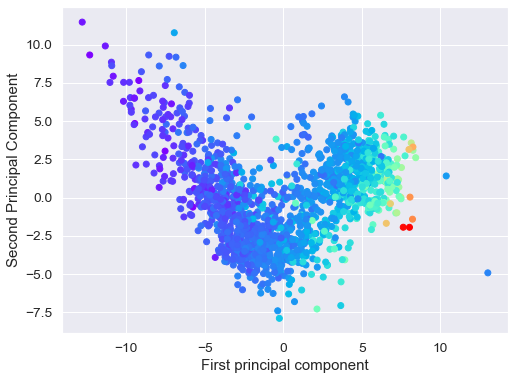

In [227]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df5['SalePrice'],cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [228]:
pca.components_

array([[ 0.06694535,  0.03655682,  0.1905293 , ..., -0.00692058,
        -0.04318095,  0.09591156],
       [-0.06563582, -0.08120174,  0.04707754, ..., -0.01420795,
        -0.0730631 ,  0.09815132],
       [ 0.06823015,  0.06156686, -0.01000377, ..., -0.00804862,
        -0.02877232,  0.02129569],
       ...,
       [-0.03538526, -0.03013871,  0.00755991, ..., -0.09555489,
         0.00296371, -0.04042605],
       [ 0.05438969,  0.04728   ,  0.07301392, ...,  0.04390315,
        -0.03129152, -0.03707458],
       [ 0.05589433, -0.01989155, -0.04862967, ..., -0.0325089 ,
         0.04169749,  0.02746259]])

In [229]:
df5.keys()

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [232]:
# PCA
#from sklearn.decomposition import PCA
#from sklearn.preprocessing import StandardScaler
df5=df.copy()
predictors = [s for s in df5.columns if s not in excludeColumns]
y3 = df5[outcome]
x3=pd.get_dummies(df5[predictors],drop_first=True)

scaler = StandardScaler()
train_x3, valid_X3, train_y3, valid_y3 = train_test_split(x3, y3, test_size=0.3, random_state=1)
scaler.fit(x3)

x3 = scaler.transform(x3)

pca = PCA(.95)
pca.fit(x3)

pca.n_components_

x3 = pca.transform(x3)

In [ ]:
x3.shape()

In [233]:
# Random Forest Regressor with 10-fold cross validation
rfr_pred = cross_val_predict(RandomForestRegressor(), x3, y3, cv=10)
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(np.exp(y5), np.exp(rfr_pred))),2))

C:\Users\John\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\John\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
#Gradient Boosting Regressor with 10-fold cross validation
gbr_pred = cross_val_predict(GradientBoostingRegressor(), x5, y5, cv=10)
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(np.exp(y5), np.exp(gbr_pred))),2))

In [ ]:
#XGB Regressor with 10-fold cross validation
xgb_pred = cross_val_predict(XGBRegressor(), x5, y5, cv=10)
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(np.exp(y5), np.exp(xgb_pred))),2))

In [ ]:
#Cat Boost Regressor with 10-fold cross validation
ctc_pred = cross_val_predict(CatBoostRegressor(), x5, y5, cv=10)
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(np.exp(y5), np.exp(ctc_pred))),2))

# Parameter optimization

In [ ]:
#
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.arange(start = 10, stop = 2000, step = 10)]
max_features = [0.5,'auto', 'sqrt','log2']
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# First create the base model to tune
m = RandomForestRegressor()
# Fit the random search model
m_random = RandomizedSearchCV(estimator = m, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
m_random.fit(train_X, train_y)
m_random.best_params_

In [ ]:
train_x3, valid_X3, train_y3, valid_y3 = train_test_split(x3, y3, test_size=0.3, random_state=1)

n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(RandomForestRegressor(), hyperF, cv = 3, verbose = 1, n_jobs = -1)
bestF = gridF.fit(train_x3, train_y3)
m_random.best_params_


In [ ]:
scores = cross_val_score(RandomForestRegressor(), x3, y3, cv=10, scoring='neg_mean_squared_error')
print('Root Mean Squared Log Error: ', [f'{acc:.3f}' for acc in scores])
print('Root Mean Squared Log Error:', scores.mean())

In [ ]:
regressionSummary(valid_y, predictions)

In [ ]:
# Perform 10-fold cross validation
scores = cross_val_score(RandomForestRegressor(), x, y, cv=10)
print('Accuracy scores of each fold: ', [f'{acc:.3f}' for acc in scores])
print('Accuracy:', scores.mean())

In [ ]:
#stacking model
models = [MLPRegressor(**grid_parm_mlp), RandomForestRegressor(**grid_parm_rfc), DecisionTreeRegressor(**grid_parm)]
      
S_Train, S_Test = stacking(models, train_X, train_y, valid_X, regression=True, verbose=2)
model = RandomForestRegressor()  
model = model.fit(S_Train, y_train)
model_pred = model.predict(S_Test)

# 